## STEP 1: Install and Import Libraries

In [54]:
# Import necessary libraries

import pandas as pd
import numpy as np
import os
import re
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## STEP 2: Download spaCy English Model

In [55]:
# Download English module for spaCy
!python -m spacy download en_core_web_sm

# Load spaCy English module
NER = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.0 kB/s eta 0:00:000:00:040:00:07:11
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## STEP 3: Load and Evaluate the 20th Century Text Data

In [104]:
# Load the 20th century key events text file

with open('./Docs/key_events_20th_century.txt', 'r', encoding='utf-8', errors='ignore') as file:
    century_data = file.read()

print(f"Text length: {len(century_data)} characters")
print(f"First 500 characters:\n{century_data[:500]}")

Text length: 66144 characters
First 500 characters:
Key events of the 20th century

The 20th century changed the world in unprecedented ways. The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created. These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.

Historic events in the 20th century

World at the beginn


## STEP 4: Text Evaluation and Wrangling

### Text Evaluation Observations:

1. **Special Characters**: Check for unusual characters, encoding issues
2. **Country Names**: Verify if country names match our predefined list
3. **Formatting**: Look for consistent formatting and structure
4. **Data Quality**: Assess overall readability and consistency

In [57]:
# Function to check for special characters

def check_special_characters(text):
    special_chars = set()
    for char in text:
        if not char.isalnum() and not char.isspace() and char not in '.,!?;:-()"\'':
            special_chars.add(char)
    return special_chars

# Check for special characters
special_chars = check_special_characters(century_data)
print(f"Special characters found: {special_chars}")

# Check text structure
lines = century_data.split('\n')
print(f"Number of lines: {len(lines)}")
print(f"Sample lines:\n")
for i in range(min(5, len(lines))):
    print(f"Line {i}: {lines[i][:100]}...")

Special characters found: {']', '—', '/', '–', '[', '’', '='}
Number of lines: 219
Sample lines:

Line 0: Key events of the 20th century...
Line 1: ==============================...
Line 2: ...
Line 3: The 20th century changed the world in unprecedented ways. The World Wars sparked tension between cou...
Line 4: ...


## STEP 5: Text Cleaning and Wrangling

In [58]:
# Clean the text data

def clean_text(text):
    # Remove excessive whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Removing special problematic characters but keep basic punctuation
    text = re.sub(r'[^\w\s.,!?;:()-]', '', text)
    
    # Standardize quotes
    text = text.replace('"', "'")
    return text.strip()

# Apply cleaning
cleaned_century_data = clean_text(century_data)
print(f"Cleaned text length: {len(cleaned_century_data)} characters")

Cleaned text length: 65323 characters


## STEP 6: Create NER Object

In [59]:
# Create NER object from the cleaned text

century_book = NER(cleaned_century_data)
print("NER object created successfully!")
print(f"Number of tokens: {len(century_book)}")
print(f"Number of sentences: {len(list(century_book.sents))}")

# Visualize a sample of identified entities
print("\nSample of identified entities:")
displacy.render(century_book[1000:2000], style="ent", jupyter=True)

NER object created successfully!
Number of tokens: 11654
Number of sentences: 275

Sample of identified entities:


## STEP 7: Split Sentence Entities

In [60]:
# Create dataframe from sentence entities
df_sentences = []

# Loop through sentences and get entity list for each sentence
for sent in century_book.sents:
    entity_list = [ent.text for ent in sent.ents]
    df_sentences.append({"sentence": sent, "entities": entity_list})

df_sentences = pd.DataFrame(df_sentences)

print(f"Total sentences processed: {len(df_sentences)}")
df_sentences.head(20)

Total sentences processed: 275


,sentence,entities
0,"(Key, events, of, the, 20th, century, , The, ...",[the 20th century The 20th century]
1,"(The, World, Wars, sparked, tension, between, ...","[The World Wars, the Cold War, the Space Race,..."
2,"(These, advancements, have, played, a, signifi...","[the 21st century, today]"
3,"(Historic, events, in, the, 20th, century, Wor...","[the 20th century, the beginning of the centur..."
4,"(The, 1900s, saw, the, decade, herald, a, seri...","[The 1900s, the decade]"
5,"(1914, saw, the, completion, of, the, Panama, ...","[1914, the Panama Canal]"
6,"(The, Scramble, for, Africa, continued, in, th...","[Scramble, Africa, the 1900s]"
7,"(The, atrocities, in, the, Congo, Free, State,...",[the Congo Free State]
8,"(From, 1914, to, 1918, ,, the, First, World, W...","[1914 to 1918, the First World War]"
9,"(The, war, to, end, all, wars, :, World, War, ...","[World War I, 19141918]"


## STEP 8: Load Countries List and Filter Entities

In [78]:
# Country list from data

valid_countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 
    'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 
    'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 
    'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 
    'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 
    'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 
    'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 
    'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 
    'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 
    'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 
    'Kazakhstan', 'Kenya', 'Kiribati', 'Korea', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 
    'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 
    'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 
    'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 
    'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 
    'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama', 
    'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 
    'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 
    'Samoa', 'San Marino', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 
    'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 
    'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Tajikistan', 
    'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 
    'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 
    'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 
    'Yemen', 'Zambia', 'Zimbabwe'
]



# Create a flat list of all country aliases
country_aliases = []
for country in countries_list:
    if ' ' in country:
        # Add both full name and potential parts
        country_aliases.extend(country.split())
    country_aliases.append(country)

country_aliases = list(set(country_aliases))  # Remove duplicates
print(f"Country aliases for filtering: {country_aliases}")

# Function to filter entities to only countries
def filter_country_entities(ent_list, country_list):
    return [ent for ent in ent_list if any(country in ent for country in country_list)]

# Apply country filtering
df_sentences['country_entities'] = df_sentences['entities'].apply(
    lambda x: filter_country_entities(x, country_aliases))

# Filter out sentences without country entities
df_sentences_filtered = df_sentences[df_sentences['country_entities'].map(len) > 0]

print(f"Sentences with country entities: {len(df_sentences_filtered)}")
df_sentences_filtered.head(20)

Country aliases for filtering: ['United Kingdom', 'China', 'Korea', 'Afghanistan', 'Italy', 'Australia', 'US', 'South Africa', 'States', 'North', 'Africa', 'North Korea', 'United States', 'USSR', 'Mexico', 'South', 'UK', 'England', 'Egypt', 'Pakistan', 'Iran', 'Soviet', 'United', 'America', 'India', 'Brazil', 'South Korea', 'Russia', 'Kingdom', 'Union', 'Soviet Union', 'Palestine', 'France', 'Germany', 'Canada', 'Israel', 'Iraq', 'Japan', 'USA', 'Britain', 'Spain', 'Vietnam']
Sentences with country entities: 128


,sentence,entities,country_entities
6,"(The, Scramble, for, Africa, continued, in, th...","[Scramble, Africa, the 1900s]",[Africa]
12,"(After, a, period, of, diplomatic, and, milita...","[the July Crisis, the end of July 1914, the Br...","[France, the Russian Empire, Russia]"
13,"(The, Bolsheviks, negotiated, the, Treaty, of,...","[Bolsheviks, Germany, Russia]","[Germany, Russia]"
14,"(In, the, treaty, ,, Bolshevik, Russia, ceded,...","[Bolshevik Russia, Baltic, Germany, Kars Oblas...","[Bolshevik Russia, Germany, the South Caucasus]"
15,"(It, also, recognized, the, independence, of, ...","[Germany, Allied, American, 1918.4]","[Germany, American]"
20,"(Many, Germans, felt, these, reparations, were...","[Germans, Germany, Allied, Kaiser, Europe]",[Germany]
25,"(The, Russian, Revolution, of, 1917, (, ending...","[The Russian Revolution of, 1917, Tsarist, Nic...","[The Russian Revolution of, the Soviet Union]"
28,"(Many, people, saw, this, as, the, first, stag...","[first, Soviet Unions, the 1930s, World War I,...",[Soviet Unions]
37,"(The, rise, of, dictatorship, Fascism, first, ...","[first, Italy, Benito Mussolini, 1922.28]",[Italy]
39,"(When, Adolf, Hitler, came, to, power, in, Ger...","[Hitler, Germany, 1933, Nazism, Germany, German]","[Germany, Germany]"


## STEP 9: Standardize Country Names

In [77]:
# Function to standardize country names

def standardize_country_names(country_list):
    standardized = []
    for country in country_list:
        # Map variations to standard names
        if any(alias in country for alias in ['United States', 'USA', 'US', 'America']):
            standardized.append('United States')
        elif any(alias in country for alias in ['United Kingdom', 'UK', 'Britain', 'England']):
            standardized.append('United Kingdom')
        elif any(alias in country for alias in ['Soviet Union', 'USSR', 'Russia']):
            standardized.append('Soviet Union')
        elif any(alias in country for alias in ['North Korea', 'Democratic People']):
            standardized.append('North Korea')
        elif any(alias in country for alias in ['South Korea', 'Republic of Korea']):
            standardized.append('South Korea')
        else:
            # Keep the original if no mapping found
            standardized.append(country)
    return list(set(standardized))  # Remove duplicates

# Apply standardization
df_sentences_filtered['country_entities'] = df_sentences_filtered['country_entities'].apply(
    lambda x: standardize_country_names(x)
)

print("Country entities after standardization:")
df_sentences_filtered.head(20)

Country entities after standardization:


,sentence,entities,country_entities
6,"(The, Scramble, for, Africa, continued, in, th...","[Scramble, Africa, the 1900s]",[Africa]
12,"(After, a, period, of, diplomatic, and, milita...","[the July Crisis, the end of July 1914, the Br...","[Soviet Union, France]"
13,"(The, Bolsheviks, negotiated, the, Treaty, of,...","[Bolsheviks, Germany, Russia]","[Germany, Soviet Union]"
14,"(In, the, treaty, ,, Bolshevik, Russia, ceded,...","[Bolshevik Russia, Baltic, Germany, Kars Oblas...","[the South Caucasus, Germany, Soviet Union]"
15,"(It, also, recognized, the, independence, of, ...","[Germany, Allied, American, 1918.4]","[Germany, United States]"
20,"(Many, Germans, felt, these, reparations, were...","[Germans, Germany, Allied, Kaiser, Europe]",[Germany]
25,"(The, Russian, Revolution, of, 1917, (, ending...","[The Russian Revolution of, 1917, Tsarist, Nic...",[Soviet Union]
28,"(Many, people, saw, this, as, the, first, stag...","[first, Soviet Unions, the 1930s, World War I,...",[Soviet Union]
37,"(The, rise, of, dictatorship, Fascism, first, ...","[first, Italy, Benito Mussolini, 1922.28]",[Italy]
39,"(When, Adolf, Hitler, came, to, power, in, Ger...","[Hitler, Germany, 1933, Nazism, Germany, German]",[Germany]


## STEP 10: Create Relationships DataFrame

In [80]:
# Create relationships between countries that appear together

relationships = []

# Define window size for relationship analysis
window_size = 3

for i in range(len(df_sentences_filtered) - window_size + 1):
    end_i = min(i + window_size, len(df_sentences_filtered))
    
    # Get all country entities in the current window
    country_list = []
    for j in range(i, end_i):
        country_list.extend(df_sentences_filtered.iloc[j]['country_entities'])
    
    # Remove duplicates that are next to each other
    country_unique = [country_list[k] for k in range(len(country_list)) 
                     if (k == 0) or country_list[k] != country_list[k-1]]
    
    # Create relationships between unique countries in the window
    if len(country_unique) > 1:
        for idx, country_a in enumerate(country_unique[:-1]):
            country_b = country_unique[idx + 1]
            relationships.append({"source": country_a, "target": country_b})

# Create relationships dataframe
relationship_df = pd.DataFrame(relationships)
print(f"Total relationships found: {len(relationship_df)}")
relationship_df.head(20)

Total relationships found: 695


,source,target
0,Africa,France
1,France,the Russian Empire
2,the Russian Empire,Russia
3,Russia,Germany
4,Germany,Russia
5,France,the Russian Empire
6,the Russian Empire,Russia
7,Russia,Germany
8,Germany,Russia
9,Russia,Bolshevik Russia


## STEP 11: Process and Summarize Relationships

In [95]:
# Sort relationships to ensure consistency (A->B and B->A are treated the same)

relationship_df_sorted = pd.DataFrame(
    np.sort(relationship_df[['source', 'target']].values, axis=1), 
    columns=['source', 'target'])

# Add value column for counting
relationship_df_sorted["value"] = 1

# Group by source-target pairs and sum the values
relationship_summary = relationship_df_sorted.groupby(
    ["source", "target"], as_index=False
).sum().sort_values("value", ascending=False)

print("Top country relationships:")
print(relationship_summary.head(20))

# Get relationship statistics
print(f"\nRelationship Statistics:")
print(f"Total unique country pairs: {len(relationship_summary)}")
print(f"Most frequent relationship: {relationship_summary.iloc[0]['source']} - {relationship_summary.iloc[0]['target']} (count: {relationship_summary.iloc[0]['value']})")

Top country relationships:
               source             target  value
17           American              Japan     15
18           American           Japanese     14
100             Japan           Japanese     12
172            Soviet   the Soviet Union     12
69            Germany              Japan     11
35            Britain             France     11
107             Japan                 US     11
60             France            Germany     10
168            Soviet               USSR     10
16           American            Germany     10
193  the Soviet Union  the United States      9
82            Germany  the United States      9
81            Germany   the Soviet Union      9
118          Japanese             Soviet      8
21           American   South Vietnamese      8
48              China           Japanese      8
39            Britain   the Soviet Union      7
73            Germany             Russia      7
25          Americans           Japanese      6
127          

## STEP 12: Create Visualization Function

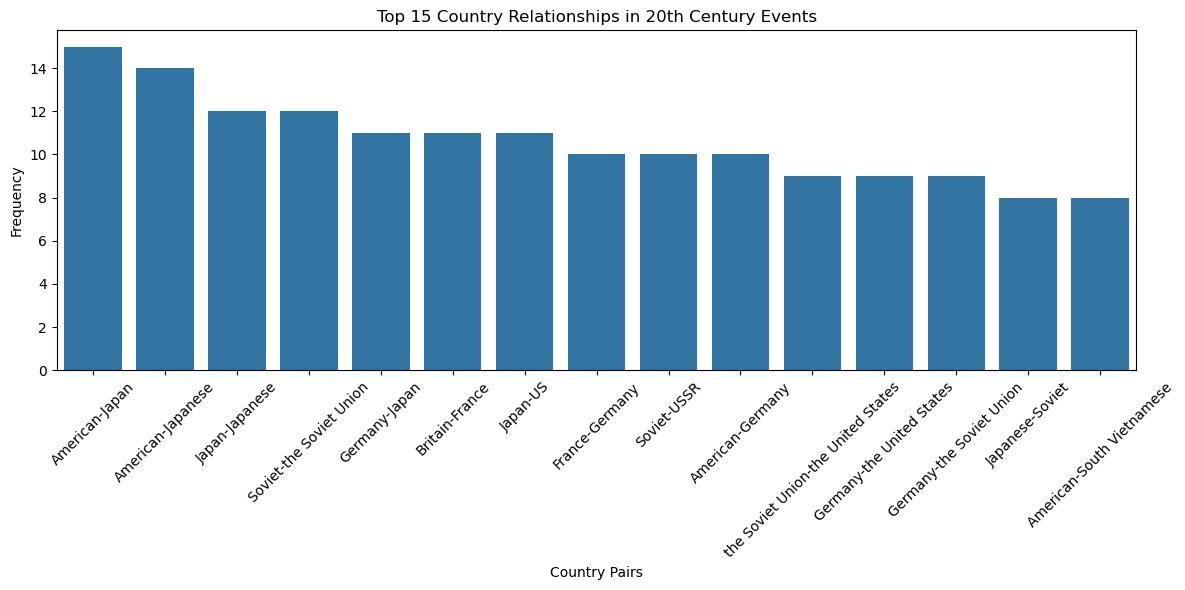


Summary Statistics:
total_sentences: 275
sentences_with_countries: 128
total_relationships: 695
unique_country_pairs: 195
most_frequent_pair: American-Japan
most_frequent_count: 15


In [102]:
# Create reusable bar plot function 
def top_n_barplot(x, y, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x, y=y)
    plt.title(title)
    plt.xlabel('Country Pairs')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.savefig('Top 15 Country Relationship.png')
    plt.tight_layout()
    plt.show()

# Create labels for the top relationships
top_relationships = relationship_summary.head(15)
relationship_labels = [f"{row['source']}-{row['target']}" for _, row in top_relationships.iterrows()]

# Plot top relationships
top_n_barplot(relationship_labels, top_relationships['value'], 
              "Top 15 Country Relationships in 20th Century Events")

# Save summary statistics
summary_stats = {
    'total_sentences': len(df_sentences),
    'sentences_with_countries': len(df_sentences_filtered),
    'total_relationships': len(relationship_df),
    'unique_country_pairs': len(relationship_summary),
    'most_frequent_pair': f"{relationship_summary.iloc[0]['source']}-{relationship_summary.iloc[0]['target']}",
    'most_frequent_count': relationship_summary.iloc[0]['value']}

print("\nSummary Statistics:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")

In [100]:
# Save data to CSV for future use

relationship_summary.to_csv('country_relationships_20th_century.csv', index=False)